In [ ]:
import torch

In [ ]:
#We can make tensors via torch.tensor(data) and inputting the data we want to convert to our tensor from our memory
#We can also convert from numpy array to tensor via torch.from_numpy(numpy data)
#Note that the new tensor maintains the shape of the original tensor as well as its data type
#with a tensor we can check the shape with .shape, we can check the datatype with .dtype and we can check the device it is stored on with .device
tensor = torch.ones(4,4)
print(tensor)
tensor.shape

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


torch.Size([4, 4])

In [ ]:
tensor.dtype

torch.float32

In [ ]:
tensor.device

device(type='cpu')

In [ ]:
tensor1 = torch.concat([tensor, tensor, tensor], dim = 0) #0 will be along row and 1 will be along column which makes sense since typically dimensions are denoted HxW where H is row
#and W is columns

In [ ]:
tensor1

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
tensormatmul = tensor1.matmul(tensor1.T)
tensormatmul

tensor([[4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.]])

In [ ]:
tensormatmul2 = tensor1 * tensor1

In [ ]:
tensormatmul2 #element wise!

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
#Operations have a suffix _ after them will edit the tensor we are doing the operation with, for example
tensor1

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
tensor1.add_(5)
tensor1 #Note how the operation works element wise like numpy

tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]])

In [ ]:
import torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1,3,64,64)
label = torch.rand(1,1000)
prediction = model(data)
loss = (prediction - label).sum()
loss.backward()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2, momentum = 0.9)
optimizer.step()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
loss

tensor(-487.9855, grad_fn=<SumBackward0>)

In [ ]:
#The idea is that after we calculate the loss, we do a backward() pass. Then at this point the loss was calculated and the backprop was done as well
#now all we have to do is update the model parameters according to each units associated gradient. Then repeat the process over and over again,

The detail workings of why the above differentiation api works.

In [ ]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
Q = 3*a**3 - b**2 #Note that double astrik means exponent
#Now lets assume Q is the error function and a and b are the model parameters, we want gradient of error with respect to parameters to be the following

Now the idea is that when we call .backward() on Q (the loss function in this case), it calculates the gradients with respect to the parameters and stores them in the respective tensors .grad attribute (initialized with requires_grad) I believe. Also note that the output will be a vector if we do not use .sum(), so make sure to always use .sum() before calling .backward() this saves a lot of time, 

In [ ]:
# Q.sum().backward()
print(9*a**2 == a.grad)
print(-2*b == b.grad)
#The idea is that after we do .backward(), all of the gradients of the loss with respect to the variables are stored within the .grad() property of the variable

tensor([True, True])
tensor([True, True])


We can also just say gradients are 'deposited' into the parameters of the network. Note that chain rule can be done in a recursive manner manually in code and that to take a derivative we just need to use the derivatives definition which is something we can easily look up. 

It is also important to note that we need to zero out gradients when we are doing a loop because they are not over written after we run one pass of the gradients. We can do classic gradient updating manually, but there are many ways to compute efficient gradients. However if we want to do them manually we can actually make a for loop and go through the models parameters. when going through the parameters we take the .data and do the .sub_ which stands for substract in place and within the parameter of .sub_ input the learning rate as well as the .grad.data itself. However tensorflow makes this easy by giving us the torch optim api. Note that this is why torch.optim requires us to input the model parameters, as this is what it needs in order to do the special step. We zero gradients through the optimizer

In [26]:
import torchvision
import torchvision.transforms as transforms 
import numpy as np
import matplotlib.pyplot as plt
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)) #all this is doing for each of the 3 channels is normalizing accross them mean and variance
])
batch_size = 4
traindata = torchvision.datasets.CIFAR10(root = '/content/drive/MyDrive/PytorchDatasets/traindata', train=True, download=True, transform = transform)
trainloader = torch.utils.data.DataLoader(traindata, batch_size=batch_size, shuffle=True, num_workers=2)
#Note that when we are working with custom data we use torchvision.datasets.ImageFolder() and do the same thing as above

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/PytorchDatasets/traindata/cifar-10-python.tar.gz to /content/drive/MyDrive/PytorchDatasets/traindata


In [27]:
testdata = torchvision.datasets.CIFAR10(root = '/content/drive/MyDrive/PytorchDatasets/testdata', train=False, download=True, transform = transform)
testloader = torch.utils.data.DataLoader(testdata, batch_size = batch_size, shuffle=True, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog','horse', 'ship', 'truck')
def imshow(image):
  image = image/2 + 0.5
  numpyimage = image.numpy()
  plt.imshow(np.transpose(numpyimage, (1,2,0)))
  plt.show()

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/PytorchDatasets/testdata/cifar-10-python.tar.gz to /content/drive/MyDrive/PytorchDatasets/testdata


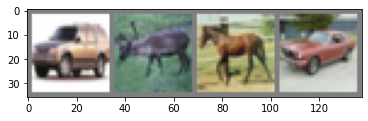

In [29]:
dataiter = iter(trainloader)
images,label = dataiter.next()
imshow(torchvision.utils.make_grid(images))

In [34]:
class Net(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = torch.nn.Conv2d(3, 6, 5)
    self.relu1 = torch.nn.ReLU()
    self.pool = torch.nn.MaxPool2d(2,2)
    self.conv2 = torch.nn.Conv2d(6, 16, 5)
    self.relu2 = torch.nn.ReLU()
    self.fc1 = torch.nn.Linear(16 * 5 * 5, 120)
    self.relu3 = torch.nn.ReLU()
    self.fc2 = torch.nn.Linear(120, 84)
    self.relu4 = torch.nn.ReLU()
    self.fc3 = torch.nn.Linear(84, 10)
  def forward(self, x):
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = self.relu2(x)
    x = self.pool(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    x = self.relu3(x)
    x = self.fc2(x)
    x = self.relu4(x)
    x = self.fc3(x)
    return x

In [35]:
network = Net()

In [36]:
criteria = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr = 0.001, momentum = 0.9)

In [37]:
for epoch in range(2):
  current_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    input, label = data
    optimizer.zero_grad()

    output = network(input)
    loss = criteria(output , label).sum()
    loss.backward()
    optimizer.step()

    current_loss += loss.item()
    if i % 2000 == 1999:
      print("Loss:", current_loss/2000)
      current_loss = 0

Loss: 2.173913501739502
Loss: 1.813602940708399
Loss: 1.6234616119861602
Loss: 1.5368494859784843
Loss: 1.4777209176570176
Loss: 1.4292776163741947
Loss: 1.3847157019898295
Loss: 1.3473273224979638
Loss: 1.3239466520771384
Loss: 1.284967696171254
Loss: 1.2852985333763063
Loss: 1.2484736872166395


In [42]:
tensor.device

device(type='cpu')

In [45]:
#Note that when we are saving a model for later inference, it is only necessary we save the current parameters of the model as well as the 
#current parameters of the optimizer, we can do this via the following
torch.save({
    'network_model_parameters': network.state_dict(),
    'optimizer_parameters': optimizer.state_dict(),
}, '/content/drive/MyDrive/PytorchDatasets/parameters')

In [46]:
#Note that we need to use torch.load() to 'deserialize' the parameters from the files state
currentcheckpoint = torch.load('/content/drive/MyDrive/PytorchDatasets/parameters')
newnetwork = Net()
newnetwork.load_state_dict(currentcheckpoint['network_model_parameters'])
newoptimizer = torch.optim.SGD(newnetwork.parameters(), lr = 0.001, momentum = 0.9)
newoptimizer.load_state_dict(currentcheckpoint['optimizer_parameters'])

In [ ]:
#Now this is a simple way we can save the loaded model and then do inference with these weights.
#IT IS VERY IMPORTANT WE DO model.eval() in order to prepare the model for training. We can prepare the model to train with the .train()

In [48]:
newnetwork.train()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (relu4): ReLU()
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [49]:
newnetwork.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (relu4): ReLU()
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Note that since we can use a dictionary to save models, we can save multiple model parameters and optimizers to the same file. There is no problem with that. Additionally when we want to use parameters from another model that does not match exactly the architecture of the model we are on, we can do the typical implementation except in the load_state_dict() function we set strict=False, and it handles that problem fr us.

Nice introduction to pytorch, feels really good and comprehensive. The API seems excellent so far.